## KNN

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Loading Data
data = pd.read_csv("final_validated_data.csv")
data.head()

,Unnamed: 0,RowID,maxsal,minsal,intern_num,month_num,day,industry,city,scale,...,招聘,媒体,内容,专员,产品,销售,开发,工程师,助理,运营
0,0,0,100,50,62,3,5,互联网/游戏/软件,北京,2000人以上,...,0,1,0,0,0,0,0,0,0,0
1,1,1,150,100,5,4,5,教育/培训,深圳,15-50人,...,0,0,0,0,0,0,0,0,0,0
2,2,2,300,250,8,4,5,互联网/游戏/软件,上海,15-50人,...,0,0,0,0,0,0,0,0,0,0
3,3,3,100,100,3,4,4,教育/培训,上海,15-50人,...,0,0,0,0,0,0,0,0,0,0
4,4,4,150,100,176,3,4,互联网/游戏/软件,广州,2000人以上,...,0,0,0,0,1,0,0,0,0,1


### Cleaning Data and Labeling

(array([1180.,    0.,    0., 1622.,    0.,    0., 1170.,    0.,    0.,
        1026.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

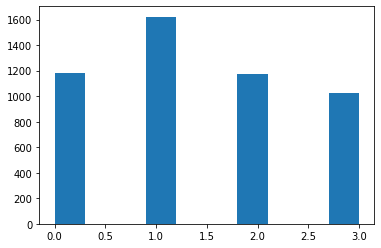

In [6]:

IT_df = data.drop(['Unnamed: 0', 'RowID', 'maxsal', 'minsal','industry', 'city', 'scale', 'name', 'uuid', 'c_desc', 'c_tag','c_name'],axis=1)

# #确定 X和 y

X = IT_df

# Label the max salary (4 classes)
label = []
max_sal = data["maxsal"].to_numpy()
for i in max_sal:

    if i in range(0,150):
        label.append(0)
    elif i in range(150,175):
        label.append(1)
    elif i in range(175,250):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
plt.hist(y)

### Scaling and Spliting

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Divide into train, validate, and test set
# X_final_test and y_final_test are our test set, we will not touch it 
# X_test and y_test are out validation set. 

X_train, X_final_test, y_train, y_final_test = train_test_split(X, y, test_size=0.1, shuffle = True, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle = True, random_state=123)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Baseline
print(1622/len(y))

0.32452981192476993


In [18]:
X

,intern_num,month_num,day,互联网,教育,房产,广告,金融,企业服务,快消,...,招聘,媒体,内容,专员,产品,销售,开发,工程师,助理,运营
0,62,3,5,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,5,4,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,4,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,176,3,4,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,176,3,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4994,19,6,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4995,4,3,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,1,3,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0.4588888888888889


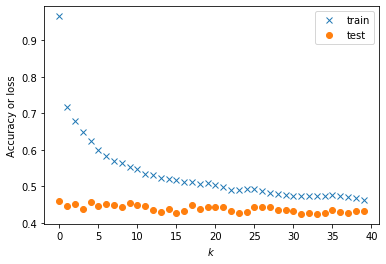

In [10]:
# Try differetn K

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_train = []
acc_test  = []

# train_losses = []
# test_losses = []

for i in range(1,41):
    model = KNeighborsClassifier(i)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc_test.append(accuracy_score(y_pred,y_test))
    y_pred = model.predict(X_train_scaled)
    acc_train.append(accuracy_score(y_pred,y_train))
    
#     train_loss = log_loss(y_train,model.predict_proba(X_train_scaled))
#     test_loss = log_loss(y_test,model.predict_proba(X_test_scaled))
#     train_losses.append(train_loss)
#     test_losses.append(test_loss)
    
%matplotlib inline

plt.plot(acc_train,'x',label="train");
plt.plot(acc_test,'o',label="test");

# plt.plot(train_losses,'x',label="train_loss");
# plt.plot(test_losses,'o',label="test_loss");

plt.xlabel('$k$'); plt.ylabel('Accuracy or loss')
plt.legend();
print(max(acc_test))

### Grid Search and Cross Validation

In [15]:
from sklearn.model_selection import GridSearchCV

parameters = {

    'n_neighbors' : [x for x in range(1,40)]
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid = parameters, scoring = 'accuracy', cv=4, return_train_score = True)
grid_search.fit(X_train_scaled, y_train)
# print(grid_search.cv_results_)
print(grid_search.best_params_)

{'n_neighbors': 11}


In [17]:
model = KNeighborsClassifier(10)
model.fit(X_train_scaled, y_train)

# y_pred = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# print(accuracy_score(y_pred,y_train))
print(accuracy_score(y_pred_test,y_test))



0.4533333333333333


In [ ]:
### Final Test Set

In [ ]:
y_pred_test_final = model.predict(X_test_scaled)

# print(accuracy_score(y_pred,y_train))
print(accuracy_score(y_pred_test,y_test))